| 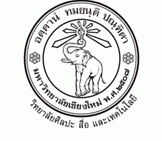 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          |        <em><font size=5>Department of Modern Management and <br> Information Technology </font></em><br>  <font size=3>College of Arts, Media and Technology,<br> Chiang Mai University<br></font> Midterm Examination, Academic Year 2021 <br> Business Data Mining 954471
|:- |-: 
|<strong>October 18th, 2021 8:00 - 23:59 </strong>| <strong>(Total 35 Points) </strong>

<b>Name____Narin__Saeseaw______________________________________________      Student ID_________612110159___________</b>

Instructions: 

-	This exam is worth 35% of your final grade.
-	This exam consists of 5 Questions
-	Finish this exam, download it as .ipynb file and send it to my FB messenger.
-	Write your student ID as filename. 
-	Allow anything.
-	<b>Please do this exam alone and be honest to yourself. </b>
-	The time allowed students to leave the testing room after the exam is open to copy it.
-	Students who cheat in any way will be prosecuted by the CMU regulation BE 2554, which governs student behavior and describes discipline during the exam period. The proctor must report any suspected cheating to the director.
<br>

### <em>Score Sheet:</em>
|<font size=3> Question|<font size=3> Full Mark|<font size=3> Student’s Mark|
|:- |:-:|:-:
<font size=3> Q1 |<font size=3> 5|
<font size=3> Q2 |<font size=3> 5|
<font size=3> Q3 |<font size=3> 5|
<font size=3> Q4 |<font size=3> 10|
<font size=3> Q5 |<font size=3> 10|
<font size=3> Total|<font size=3> 35|








In [20]:
import numpy as np
import pandas as pd

#### Q1. Create Model to predict the Telco customer churn (Churn = Label).
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [2]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

In [3]:
df.isnull().any()

In [4]:
df[df.isna().any(axis=1)]

In [5]:
df.dtypes

In [6]:
df.tenure.unique()

In [7]:
dfclean = df.drop(['customerID','gender','Partner','Dependents'], axis =1)
dfclean

In [8]:
dfclean.StreamingMovies.unique()

In [9]:
dfclean = dfclean.replace({ 'PhoneService' :     { 'No' : 0, 'Yes' : 1},
                            'MultipleLines' :    { 'No' : 0, 'Yes' : 1, 'No phone service' : 2},
                            'InternetService' :  { 'No' : 0, 'DSL' : 1, 'Fiber optic' : 2 },
                            'OnlineSecurity' :   { 'No' : 0, 'Yes' : 1, 'No internet service' : 2 },
                            'OnlineBackup' :     { 'No' : 0, 'Yes' : 1, 'No internet service' : 2 },
                            'DeviceProtection' : { 'No' : 0, 'Yes' : 1, 'No internet service' : 2 },
                            'TechSupport' :      { 'No' : 0, 'Yes' : 1, 'No internet service' : 2 },
                            'StreamingTV' :      { 'No' : 0, 'Yes' : 1, 'No internet service' : 2 },
                            'StreamingMovies' :  { 'No' : 0, 'Yes' : 1, 'No internet service' : 2 },
                            'PaperlessBilling' : { 'No' : 0, 'Yes' : 1},
                            'PaymentMethod' :    { 'Electronic check' : 0, 'Mailed check' : 1, 'Bank transfer (automatic)' : 2, 'Credit card (automatic)' : 3},
                            'Contract' :         { 'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2},
                            'Churn' :            { 'No' : 0, 'Yes' : 1}})

In [10]:
dfclean

In [11]:
dfclean.dtypes

In [12]:
dfclean['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [13]:
dfclean = dfclean.dropna()

In [31]:
y = dfclean['Churn'].values
X = dfclean.drop(['Churn'],axis = 1).values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1,2,3,4,5,6,7,8]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#### Q2. Create Model to predict the spam mail utilizing feature selection method. (Column 0 = Label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [67]:
df = pd.read_csv("../input/plenoi-mail/MAIL.csv", header = None)
df_test = pd.read_csv("../input/plenoi-mail/MAIL_test.csv", header = None)
df_test.head()

In [68]:
df

In [69]:
df.groupby(0)[0].count()

In [70]:
df_spam = df[(df[0]==0) | (df[0]==1)]
df_spam.shape

In [71]:
X = df_spam.drop([0],axis=1).values
y = df_spam[0].values

In [72]:
X.shape

In [73]:
y.shape

In [74]:
X

In [75]:
np.unique(y)

In [76]:
[sum(y == item) for item in np.unique(y)]

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res)
X_test_norm = scl.transform(X_test)
y = y_res

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1,2,3,4,5,6,7,8]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

In [86]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['spam', 'not spam']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [87]:
dftest = df_test[(df_test[0]==0) | (df_test[0]==1)]
dftest.shape

In [88]:
Xb = dftest.drop([0],axis=1).values
yb = dftest[0].values

In [89]:
X_blind_norm = scl.transform(Xb)

In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_blind_norm)
print("Test accuracy : "+str(sum(y_predict == yb)/len(y_predict)*100))

In [93]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['spam', 'not spam']
C = confusion_matrix(yb,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#### Q3. Create Deep Learning Model to predict the quality of wine. Our model will focus only on wine with quality of 5, 6, 7 (quality = label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [7]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

In [8]:
df

In [9]:
df.groupby('quality')['quality'].count()

In [10]:
dfclean = df[(df['quality']==5) | (df['quality']==6) | (df['quality']==7)]
dfclean.shape

In [11]:
dfclean

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
        'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
X_fs = dfclean[cols]
y_fs = dfclean['quality']
X_train, X_test, y_train, y_test = train_test_split (X_fs,y_fs,
                                               test_size = .3,
                                               stratify = y_fs,
                                               random_state = 7)

In [44]:
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res)
X_test_norm = scl.transform(X_test)
y_fs = y_res

In [45]:
estimator = GradientBoostingClassifier(n_estimators = 100)

selector = RFE(estimator, 6, step = 1)
selector = selector.fit(X_train,y_train)

In [46]:
selector.support_

In [47]:
selector.ranking_

In [48]:
sel_cols = np.array(cols)[selector.support_]
sel_cols

In [49]:
X_train_sel = pd.DataFrame(selector.transform(X_train), columns = np.array(cols)[selector.support_])
X_test_sel = pd.DataFrame(selector.transform(X_test), columns = np.array(cols)[selector.support_])

In [50]:
X_train_sel.head()

In [51]:
X_test_sel.head()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1,2,3,4,5,6,7,8]}
model = GridSearchCV(LogisticRegression(random_state=7, solver='liblinear'),params, cv=10)
model.fit(X_train_sel, y_train)
print("Best params : " + str(model.best_params_))
print("10CV accuracy : "+str(model.best_score_*100))

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = model.predict(X_test_sel)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['5', '6','7']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#### Q4. From this food images ("../input/food41/images"), please create an image classifier to classify 2 types of food choosing by yourself. (Show me the accuracy of each type of food) 
<b><font color=red>Both types of food must be more than 50% to get full score.</font></b>

In [ ]:
import os
for dirname, _, foods in os.walk('/kaggle/input/food41/images/deviled_eggs'):
    for foods in foods:
        print(os.path.join(dirname, foods))

In [ ]:
import os
for dirname, _, foods in os.walk('/kaggle/input/food41/images/red_velvet_cake'):
    for foods in foods:
        print(os.path.join(dirname, foods))

In [11]:
import glob
Red = glob.glob("/kaggle/input/food41/images/chicken_curry/*.*")
ptfilename = glob.glob("/kaggle/input/food41/images/pad_thai/*.*")

In [12]:
import glob
RedVelvetCake = glob.glob("/kaggle/input/food41/images/red_velvet_cake/*.*")
DeviledEggs = glob.glob("/kaggle/input/food41/images/deviled_eggs/*.*")

In [9]:
!mkdir train
!mkdir test
!mkdir train/red_velvet_cake
!mkdir train/devilled_eggs
!mkdir test/red_velvet_cake
!mkdir test/devilled_eggs

In [16]:
import shutil 
for i in range(len(RedVelvetCake)):
    if RedVelvetCake == RedVelvetCake:
        shutil.copy(RedVelvetCake[i], './train/red_velvet_cake')

In [17]:
import shutil 
for i in range(len(DeviledEggs)):
    if DeviledEggs == DeviledEggs:
        shutil.copy(ptfilename[i], './train/devilled_eggs')

In [18]:
import glob
rvvc = glob.glob("./train/red_velvet_cake/*.*")
de = glob.glob("./train/devilled_eggs/*.*")

In [21]:
rng = np.random.RandomState(7)
midx = rng.choice(rvvc,20, replace=False)
fidx = rng.choice(de,20, replace=False)

In [22]:
for item in fidx:
    shutil.move(item,'./test/red_velvet_cake/')
for item in midx:
    shutil.move(item,'./test/devilled_eggs/')

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        #rescale = 1.0/255.0,   # Intensity Normalized
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,   # randomly flip images
        validation_split=0.2)

In [98]:
train_dir = './train'
batchtrain = 15
batchval = 15
img_height = 100 
img_width  = 100
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batchtrain,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batchval,
    class_mode='binary',
    subset='validation') # set as validation data

In [99]:
train_generator.class_indices

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
# preparing the layers in the Convolutional Deep Neural Network
def create_model():
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = train_generator.image_shape))
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dropout(rate = 0.1))
    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [112]:
model = create_model()
fitted_model = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batchtrain,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batchval,
    epochs = 100)

In [113]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b-', label = 'accuracy')
plt.plot(range(len(val_accuracy)), val_accuracy, 'r-', label = 'val_accuracy')
plt.legend()

In [114]:
import glob
rvvc = glob.glob("./test/red_velvet_cake/*.*")
de = glob.glob("./test/devilled_eggs/*.*")

In [115]:
from tensorflow.keras.preprocessing import image
plabel = []
for filename in rvvc:
    test_image = image.load_img(filename, target_size = (img_height, img_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    plabel.append(np.round(model.predict(test_image)[0][0]))
plabel = np.array(plabel)
sum(plabel==0)/len(plabel)*100

In [116]:
from tensorflow.keras.preprocessing import image
plabel = []
for filename in de:
    test_image = image.load_img(filename, target_size = (img_height, img_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    plabel.append(np.round(model.predict(test_image)[0][0]))
plabel = np.array(plabel)
sum(plabel==0)/len(plabel)*100

#### Q5. Create an object detection model to detect your own face in the picture. (Show me that the model can detect your face in a test image.)
<b><font color=red>The model must be able to detect your face to get full score.</font></b>